In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
# %cd /content/drive/MyDrive/folder data

In [2]:
import matplotlib.pyplot as plt
import IPython
import numpy as np
import scipy.stats
import seaborn as sns
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.feature_selection import mutual_info_classif

Nama  : Mubessirul Ummah\
NIM   : 210411100140\
Kelas : Proyek Sains Data B

# <center>**Kualitas Air Layak Minum**</center>

## Tujuan
Proses pengolahan data ini akan melakukan klasifikasi serta prediksi terhadap kualitas suatu air layak atau tidak layak dikonsumsi oleh manusia.\
klasifikasi pada proses pengolahan data ini akan membedakan air berdasarkan kelas 1 (safe atau aman) dan 0 (not safe atau tidak aman). sedangkan prediksi ini nantinya akan dilakukan melalui model yang telah dibuat pada proses klasifikasi. prediksi ini nantinya akan menggunakan fitur fitur pada data yang telah diseleksi.

## Proses Pengolahan Data

### <center>**------Data Understanding------**</center>
<center>merupakan sebuah proses untuk mendeskripsikan dan memahami sebuah dataset yang akan kita olah</center>

In [3]:
# Membaca data dari file excel
df = pd.read_excel('waterQuality1.xlsx')
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10.00,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


#### 1. Deskripsi Data
waterquality merupakan kumpulan data yang dibuat dari data imajiner kualitas air di lingkungan perkotaan. Dataset ini mencakup data kadar mikroorganisme yang terkandung di dalam air. Data tersebut berisi 21 atribut dan 7999 record, record tersebut diberi label dengan variabel kelas <b>*is_safe*</b>, yang memungkinkan klasifikasi data menggunakan nilai 1 (safe atau aman) dan 0 (not_safe atau tidak aman).\
data ini saya dapatkan dari Kaggel dengan link berikut :

In [4]:
print("Banyaknya data : ", df.shape[0])
print("Banyaknya kolom : ", df.shape[1])

Banyaknya data :  7999
Banyaknya kolom :  21


#### 2. Deskripsi Fitur Data
1.   **Aluminium** : Merupakan kandungan aluminium dalam air. berbahaya jika lebih besar dari 2,8. kandungan aluminium yang berlebihan dapat menyebabkan masalah kesehatan, terutama pada sistem saraf.
2.   **Ammonia** : Kandungan ammonia (NH3) dalam air. Amonia adalah gas dengan bau yang tajam dan beracun dalam konsentrasi tinggi. berbahaya jika lebih besar dari 32,5. Kandungan ammonia yang tinggi dalam air dapat menyebabkan kerusakan organisme akuatik dan merusak kualitas air minum.
2.   **Arsenic** : Kandungan arsenik dalam air. Arsenic adalah unsur kimia dalam tabel periodik dengan simbol As dan nomor atom 33. Arsenic dapat ditemukan secara alami di dalam kerak bumi dan digunakan dalam berbagai aplikasi industri, termasuk pembuatan kayu tahan air. arsenic berbahaya jika lebih besar dari 0,01. Kandungan arsenik yang tinggi dalam air minum dapat menyebabkan keracunan dan meningkatkan risiko kanker.
2.   **Barium**: Kandungan barium dalam air. Barium adalah unsur kimia dengan simbol Ba dan nomor atom 56. Barium digunakan dalam industri minyak dan gas, serta dalam radiografi medis. berbahaya jika lebih besar dari 2. Pemaparan jangka panjang terhadap barium dapat menyebabkan kerusakan organ dalam tubuh manusia.
2.   **Cadmium** : Kandungan kadmium dalam air. Cadmium adalah unsur kimia dengan simbol Cd dan nomor atom 48. Cadmium digunakan dalam baterai, cat, dan plastik. berbahaya jika lebih besar dari 0,005. Pemaparan cadmium dapat menyebabkan masalah kesehatan serius, termasuk kerusakan ginjal dan kanker.
2.   **Chloramine** : Kandungan chloramine dalam air. Chloramine adalah senyawa kimia yang terbentuk dari klorin dan amonia. Ini digunakan sebagai desinfektan dalam air minum. berbahaya jika lebih besar dari 4. Paparan kloramine dalam jumlah yang tinggi dapat menyebabkan iritasi mata dan tenggorokan.
2.   **Chromium** : Kandungan kromium dalam air. berbahaya jika lebih besar dari 0,1. Pemaparan kromium VI dapat menyebabkan kerusakan paru-paru, penyakit pernapasan, dan kanker.
2.   **Copper** : Kandungan tembaga dalam air. Copper adalah unsur kimia dengan simbol Cu dan nomor atom 29. Copper digunakan dalam instalasi listrik, pipa, dan peralatan masak. berbahaya jika lebih besar dari 1,3. Kandungan tembaga yang berlebihan dalam air minum dapat menyebabkan gangguan pencernaan dan masalah hati.
2.   **Fluoride** : Kandungan fluoride dalam air. Fluoride adalah ion anorganik yang penting untuk kesehatan gigi. berbahaya jika lebih besar dari 1,5. konsumsi fluoride dalam jumlah yang berlebihan dapat menyebabkan masalah kesehatan gigi dan tulang.
2.   **Bacteria** : Indikator keberadaan bakteri dalam air. Bakteri adalah mikroorganisme yang dapat ditemukan dalam air. berbahaya jika lebih besar dari 0.
2.   **Viruses** : Indikator keberadaan virus dalam air. berbahaya jika lebih besar dari 0
2.   **Lead** : Kandungan timbal dalam air. Lead adalah logam berat yang dapat menyebabkan keracunan, terutama pada anak-anak. berbahaya jika lebih besar dari 0,015. Pemaparan timbal dapat menyebabkan kerusakan otak dan sistem saraf.
2.   **Nitrates** : Kandungan nitrat dalam air. Nitrates adalah senyawa kimia yang dapat ditemukan dalam pupuk dan limbah industriberbahaya jika lebih besar dari 10. Kandungan nitrates yang tinggi dalam air dapat menyebabkan masalah kesehatan, terutama pada bayi.
2.   **Nitrites** : Kandungan nitrit dalam air. nitrites adalah senyawa kimia yang dapat ditemukan dalam pupuk dan limbah industriberbahaya jika lebih besar dari 1. Kandungan nitrites yang tinggi dalam air dapat menyebabkan masalah kesehatan, terutama pada bayi.
2.   **Mercury** : Kandungan merkuri dalam air. Mercury adalah logam berat yang dapat mengakumulasi dalam organisme hidup dan menyebabkan keracunan. berbahaya jika lebih besar dari 0,002. Pemaparan merkuri dapat merusak otak, ginjal, dan sistem saraf.
2.   **Perchlorate** : Kandungan perchlorate dalam air. Perchlorate adalah senyawa kimia yang digunakan dalam bahan peledak dan propelan roket. Pemaparan perchlorate dapat mengganggu fungsi tiroid. berbahaya jika lebih besar dari 56
2.   **Radium** : Kandungan radium dalam air. Radium adalah unsur radioaktif yang dapat ditemukan secara alami dalam tanah dan air. Paparan radium dapat meningkatkan risiko kanker. berbahaya jika lebih besar dari 5
2.   **Selenium** : Kandungan selenium dalam air. berbahaya jika lebih besar dari 0,5. konsumsi selenium yang berlebihan dapat menyebabkan masalah kesehatan, termasuk kerusakan saraf.
2.   **Silver** : Kandungan perak dalam air. berbahaya jika lebih besar dari 0,1. Konsumsi perak dalam jumlah yang berlebihan dapat menyebabkan argyria, kondisi di mana kulit manusia berubah menjadi warna biru keabu-abuan.
2.   **Uranium** : Kandungan uranium dalam air. Uranium adalah unsur radioaktif yang dapat ditemukan secara alami dalam batuan dan air. Paparan uranium dapat meningkatkan risiko kanker dan masalah ginjal. berbahaya jika lebih besar dari 0,3
2.   **Is_safe** : Kolom ini adalah label atau target variabel yang menunjukkan apakah sampel air tersebut aman untuk dikonsumsi atau tidak. class attribute {0 - not safe, 1 - safe}

fitur di atas ini mencerminkan kandungan berbagai mikroorganisme dalam air. Dalam setiap fitur atau kandungan yang ada dalam air tersebut memiliki batasan. jika kandungan mikroorganisme melebihi nilai-nilai batasan ini, air dianggap tidak aman untuk konsumsi manusia.

In [5]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

#### 3. Deskripsi Tipe Data Fitur

Berikut adalah analisis tipe data untuk setiap kolom beserta alasannya:

1. aluminium: Tipe data rasio. Kandungan aluminium dalam air memiliki nol yang bermakna, dan perbandingan antara dua nilai memiliki arti yang jelas (misalnya, 2 kali lipat).

2. ammonia: Tipe data rasio. Kandungan ammonia dalam air juga memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

3. arsenic: Tipe data rasio. Kandungan arsenik dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

4. barium: Tipe data rasio. Kandungan barium dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

5. cadmium: Tipe data rasio. Kandungan cadmium dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

6. chloramine: Tipe data rasio. Kandungan chloramine dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

7. chromium: Tipe data rasio. Kandungan chromium dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

8. copper: Tipe data rasio. Kandungan copper dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

9. flouride: Tipe data rasio. Kandungan flouride dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

10. bacteria: Tipe data rasio. Kandungan bakteri dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

11. viruses: Tipe data rasio. Kandungan virus dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

12. lead: Tipe data rasio. Kandungan lead dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

13. nitrates: Tipe data rasio. Kandungan nitrates dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

14. nitrites: Tipe data rasio. Kandungan nitrites dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

15. mercury: Tipe data rasio. Kandungan mercury dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

16. perchlorate: Tipe data rasio. Kandungan perchlorate dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

17. radium: Tipe data rasio. Kandungan radium dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

18. selenium: Tipe data rasio. Kandungan selenium dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

19. silver: Tipe data rasio. Kandungan silver dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

20. uranium: Tipe data rasio. Kandungan uranium dalam air memiliki nol yang bermakna dan perbandingan antara dua nilai memiliki arti yang jelas.

21. is_safe: Tipe data nominal. Variabel target ini merupakan label kategori yang menunjukkan apakah air layak diminum atau tidak. Ini merupakan tipe data kategorikal dengan dua kategori yang bersifat nominal.

#### 4. Identifikasi Missing Value
Pada dataset ini tidak ditemukan data yang mengalami missing value.

In [6]:
# Menghitung apakah ada nilai yang hilang dalam setiap kolom
missing_values = df.isna().any()

# Menampilkan hasil
print("Apakah ada nilai yang hilang dalam setiap kolom:")
print(missing_values)
nan_data = df[df.isna().any(axis=1)]
print("Data dengan nilai NaN:")
print(nan_data)

Apakah ada nilai yang hilang dalam setiap kolom:
aluminium      False
ammonia        False
arsenic        False
barium         False
cadmium        False
chloramine     False
chromium       False
copper         False
flouride       False
bacteria       False
viruses        False
lead           False
nitrates       False
nitrites       False
mercury        False
perchlorate    False
radium         False
selenium       False
silver         False
uranium        False
is_safe        False
dtype: bool
Data dengan nilai NaN:
Empty DataFrame
Columns: [aluminium, ammonia, arsenic, barium, cadmium, chloramine, chromium, copper, flouride, bacteria, viruses, lead, nitrates, nitrites, mercury, perchlorate, radium, selenium, silver, uranium, is_safe]
Index: []

[0 rows x 21 columns]


#### 5. Identifikasi Duplikasi Data

In [7]:
jumlah_duplikat = df.duplicated().sum()

# Menampilkan jumlah data yang duplikat
print("Jumlah data yang duplikat:", jumlah_duplikat)

Jumlah data yang duplikat: 0


#### 6. Explorasi Data (Menampilkan Grafik)

- Histogram Sebaran Frekuensi Data Setiap Kolom

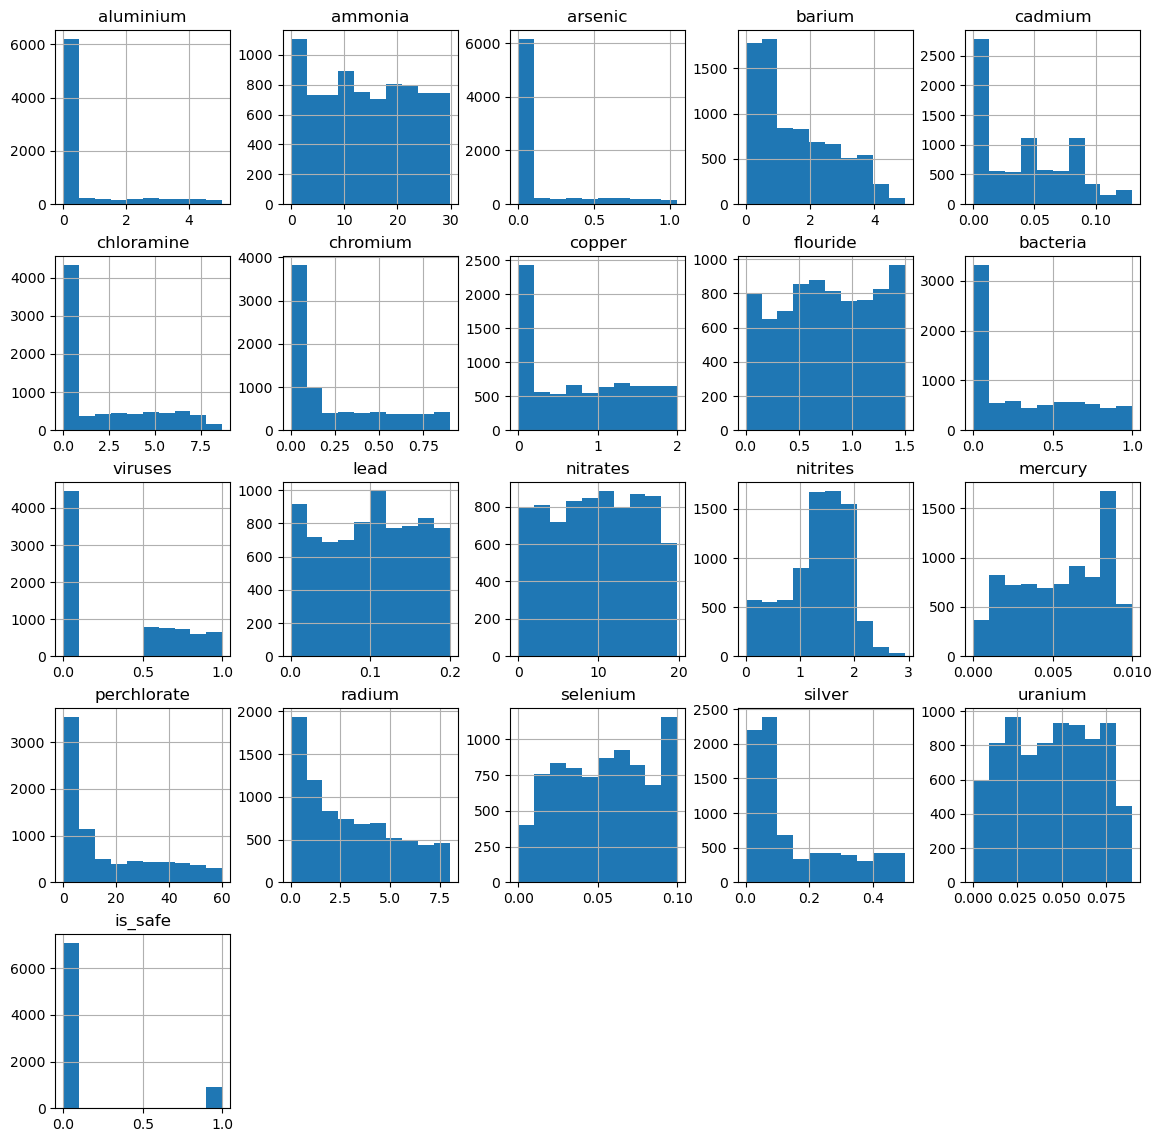

In [8]:
#distribution data
df.hist(figsize=(14, 14))
plt.show()

- Boxplot Setiap Kolom (Nilai Maksimal, Nilai Minimal, Median, Standar Devisiasi)

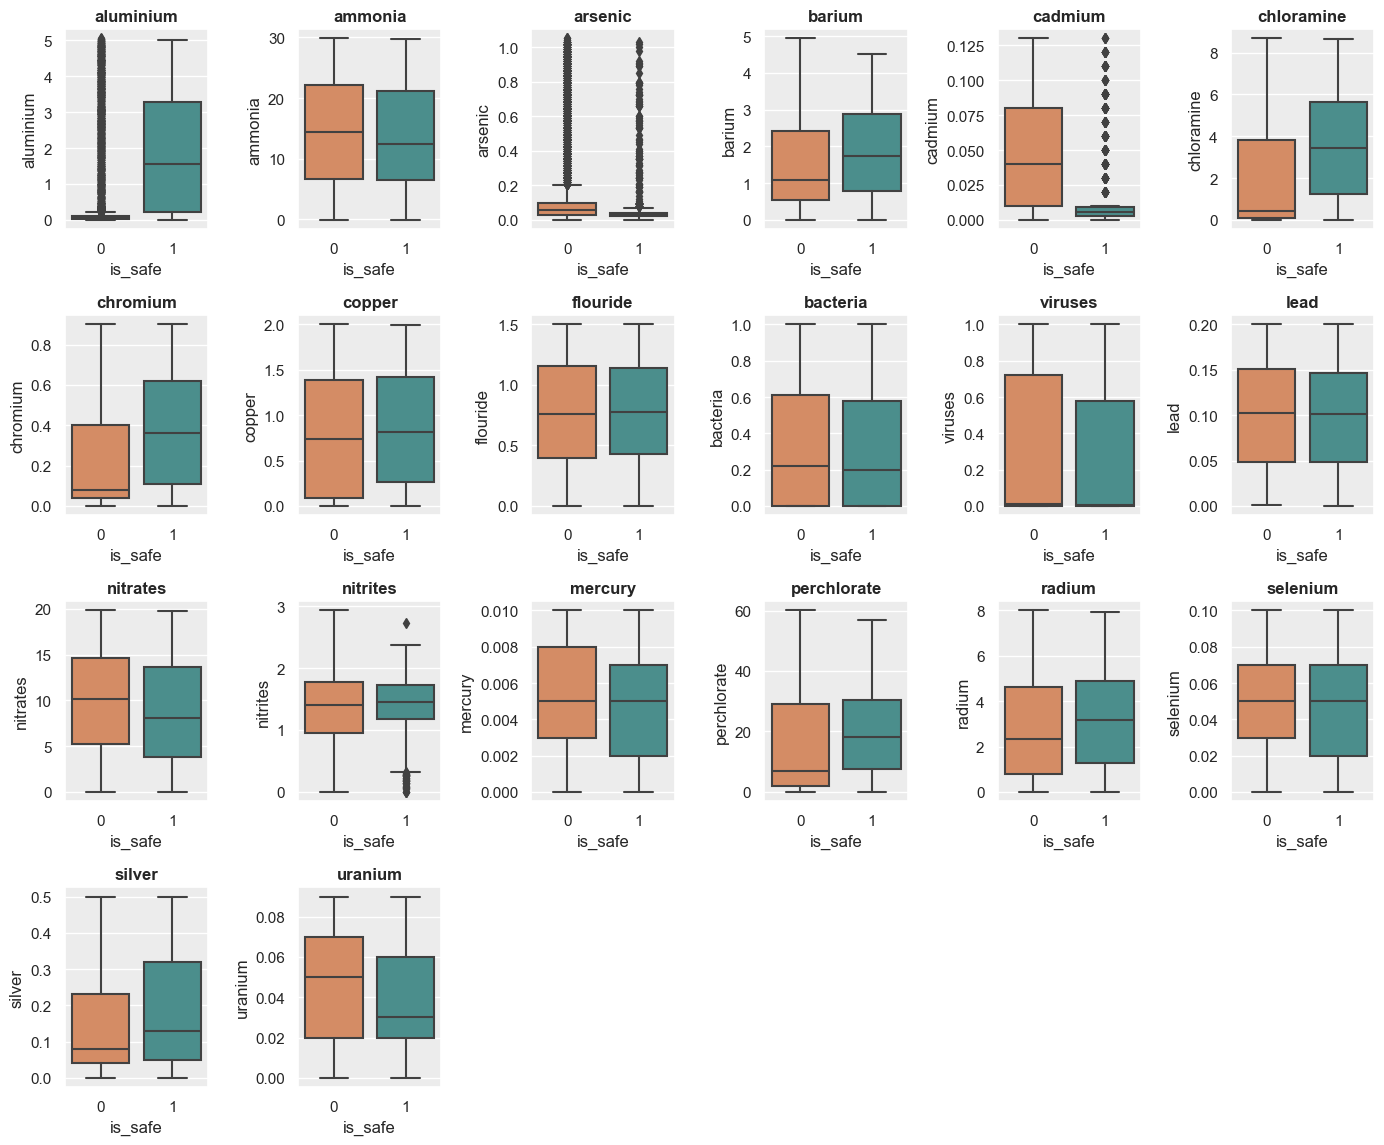

In [9]:
# Create a list of numerical features and plot them
list_of_num_features = df.drop(columns=['is_safe'])  # DataFrame of numerical features
palette_features = ['#E68753', '#409996']
sns.set(rc={'axes.facecolor':'#ECECEC'})

# Mengatur tata letak subplot
num_rows = 5
num_cols = 6
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 14), sharex=False, sharey=False)

# Flatten array of subplots for ease of indexing
axes = axes.flatten()

for idx, feature in enumerate(list_of_num_features.columns):
    ax = axes[idx]  # Mengambil subplot yang sesuai
    sns.boxplot(x='is_safe', y=feature, data=df, palette=palette_features, ax=ax)
    ax.set_title(feature, fontsize=12, fontweight='bold', ha='center')

# Sembunyikan subplot yang tidak digunakan
for i in range(len(list_of_num_features.columns), num_rows * num_cols):
    fig.delaxes(axes[i])

# Atur tata letak dan tampilkan plot
plt.tight_layout()
plt.show()

### <center>**------Pre Processing------**</center>
<center>merupakan sebuah memperbaiki sebuah data</center>

#### 1. Menemukan Data Outlier

In [10]:
import pandas as pd
import numpy as np
from scipy import stats

# Fungsi untuk mendeteksi outlier menggunakan z-score
def detect_outliers(df, threshold=3):
    z_scores = np.abs(stats.zscore(df))
    row_outliers, col_outliers = np.where(z_scores > threshold)
    return list(zip(row_outliers, col_outliers))

# Mendeteksi outlier
outliers = detect_outliers(df)

if outliers:
    print("Outlier(s) terdeteksi pada baris dan kolom berikut:")

    # Menghitung jumlah outlier
    total_outliers = len(outliers)
    print(f"Total outlier: {total_outliers}")
    # Menghapus outlier
    data_no_outliers = df.copy()
    for row, col in outliers:
        if row in data_no_outliers.index:
            data_no_outliers = data_no_outliers.drop(index=row)

    # Menghitung jumlah baris tanpa outlier
    rows_without_outliers = len(data_no_outliers)
    print(f"Jumlah baris tanpa outlier: {rows_without_outliers}")

else:
    print("Tidak ada outlier dalam data.")


Outlier(s) terdeteksi pada baris dan kolom berikut:
Total outlier: 391
Jumlah baris tanpa outlier: 7617


In [11]:
# Menghitung jumlah target pada data tanpa outlier
target_no_outliers = data_no_outliers['is_safe'].value_counts()

print("Jumlah target pada data tanpa outlier:")
print(target_no_outliers)


Jumlah target pada data tanpa outlier:
is_safe
0    6769
1     848
Name: count, dtype: int64


In [12]:
data_no_outliers.to_excel('data_bersih.xlsx', index=False)

#### 2. Balancing Class Data
Balancing kelas pada dataset ini menggunakan teknik *Balancing class data menggunakan Random Over-Sampling With imblearn*
Random Over-Sampling With imblearn adalah salah satu teknik yang digunakan untuk menangani ketidakseimbangan kelas. Dalam metode ini, jumlah sampel dalam kelas minoritas ditingkatkan dengan menambahkan salinan acak dari sampel yang sudah ada dalam kelas tersebut. Metode Random Over-Sampling memungkinkan untuk mengatasi ketidakseimbangan kelas tanpa menghapus data dari kelas mayoritas, sehingga tidak ada informasi yang hilang dalam prosesnya.

- Perbandingan jumlah kelas awal

In [13]:
data = pd.read_excel('data_bersih.xlsx')

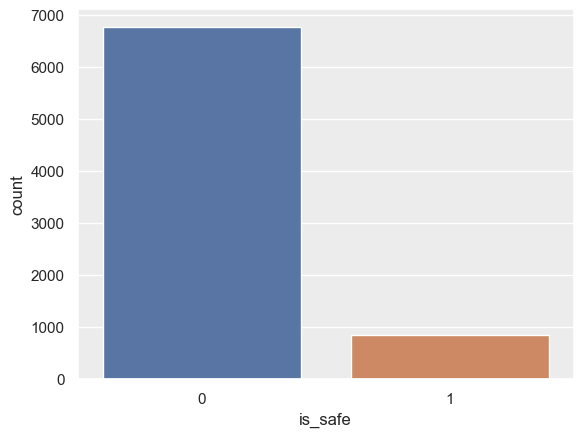

class 0 (Not Safe) : (6769, 21)
class 1 (Safe)     : (848, 21)


In [14]:
sns.countplot(data = data, x = 'is_safe')
plt.show()
# sebaran class
class_0 = data[data['is_safe'] == 0]
class_1 = data[data['is_safe'] == 1]
print('class 0 (Not Safe) :', class_0.shape)
print('class 1 (Safe)     :', class_1.shape)

- Proses Balancing Data

Sebaran Data :
Sebaran Data Kelas Awal: Counter({0: 6769, 1: 848})
Sebaran Data Kelas Setelah Balancing: Counter({1: 6769, 0: 6769})

Jumlah keseluruhan data setelah balancing sampling :
Features (X_ros) shape: (13538, 20)
Target (y_ros) shape: (13538,)


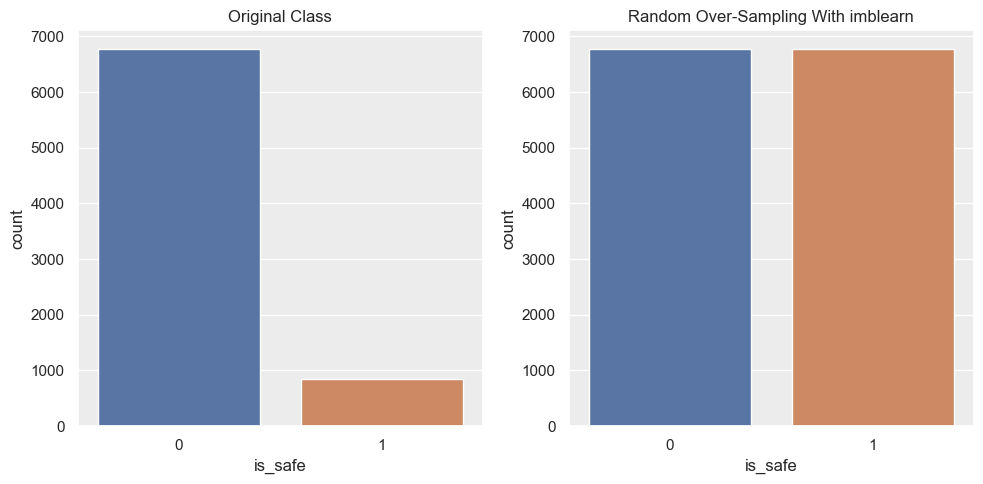

In [15]:
# import library
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

# Separate features (X) and target variable (y)
X = data.drop('is_safe', axis=1)
y = data['is_safe']

# Print original class distribution
print('Sebaran Data :')
print('Sebaran Data Kelas Awal:', Counter(y))

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Apply Random Over-Sampling to balance the classes
X_ros, y_ros = ros.fit_resample(X, y)

# Print resampled class distribution
print('Sebaran Data Kelas Setelah Balancing:', Counter(y_ros))

# Menampilkan jumlah data setelah balancing sampling
print('\nJumlah keseluruhan data setelah balancing sampling :')
print('Features (X_ros) shape:', X_ros.shape)
print('Target (y_ros) shape:', y_ros.shape)

#visualisasi perbandingan data kelas
# Plot original class distribution
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='is_safe')
plt.title('Original Class')

# Plot resampled class distribution after Random Over-Sampling
plt.subplot(1, 2, 2)
sns.countplot(data=pd.DataFrame({'is_safe': y_ros}), x='is_safe')
plt.title('Random Over-Sampling With imblearn')

plt.tight_layout()
plt.show()

In [16]:
# Mengonversi array NumPy ke DataFrame pandas
df_X_ros = pd.DataFrame(X_ros, columns=X.columns)
df_y_ros = pd.DataFrame(y_ros, columns=['is_safe'])
# Menggabungkan DataFrame X_ros dan y_ros
df_resampled = pd.concat([df_X_ros, df_y_ros], axis=1)

# Menyimpan DataFrame ke dalam file Excel
df_resampled.to_excel('data_balancing.xlsx', index=False)

##### 3. Seleksi Fitur

        feature  information_gain
15  perchlorate          0.318826
1       ammonia          0.300359
0     aluminium          0.209446
12     nitrates          0.200555
4       cadmium          0.185131
5    chloramine          0.181850
16       radium          0.136671
2       arsenic          0.096523
3        barium          0.080943
13     nitrites          0.076491
6      chromium          0.075396
11         lead          0.033615
7        copper          0.030083
10      viruses          0.028828
8      flouride          0.025350
18       silver          0.024928
19      uranium          0.022188
9      bacteria          0.017902
17     selenium          0.008770
14      mercury          0.003004


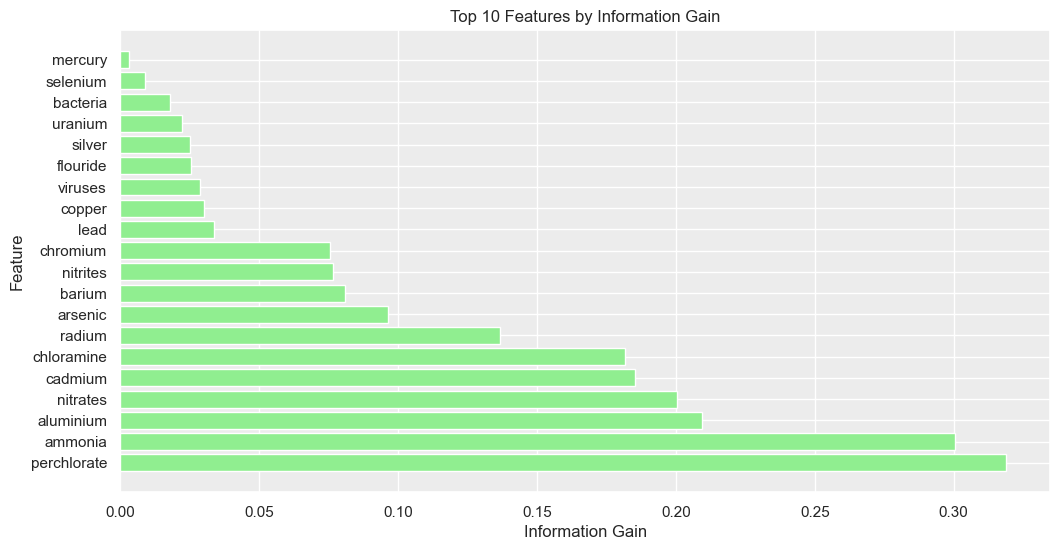

In [17]:
# Menghitung Information Gain untuk setiap fitur
information_gains = mutual_info_classif(X_ros, y_ros)

# Menyusun hasil ke dalam DataFrame untuk analisis
feature_scores = pd.DataFrame({'feature': X_ros.columns, 'information_gain': information_gains})
feature_scores = feature_scores.sort_values(by='information_gain', ascending=False)

# Menampilkan hasil Information Gain untuk setiap fitur
print(feature_scores)

# Plotting bar plot untuk perbandingan Information Gain
plt.figure(figsize=(12, 6))
plt.barh(feature_scores['feature'], feature_scores['information_gain'], color='lightgreen')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.title('Top 10 Features by Information Gain')
plt.show()

In [18]:
korelasi_data = data.corr()
korelasi_data

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.052620,0.197743,0.281000,-0.120147,0.366124,0.353400,0.157401,-0.009578,-0.066423,...,0.021714,0.011929,0.228204,-0.004285,0.359867,0.229690,0.004749,0.324705,0.005346,0.352426
ammonia,0.052620,1.000000,0.048631,0.068572,-0.009879,0.106141,0.123608,0.013056,-0.028137,0.063223,...,-0.034971,0.007193,-0.065902,0.018598,0.093548,0.045987,0.032309,0.072125,0.016762,-0.023530
arsenic,0.197743,0.048631,1.000000,0.341812,0.317161,0.353721,0.309112,-0.041724,0.001937,0.043658,...,-0.093871,0.030767,0.292210,-0.014410,0.318377,0.203057,0.000296,0.303865,0.001348,-0.109699
barium,0.281000,0.068572,0.341812,1.000000,-0.061423,0.448267,0.416904,0.062726,-0.021346,0.107645,...,-0.041571,-0.008805,0.304819,0.006374,0.464943,0.280563,0.039059,0.433037,-0.005683,0.094403
cadmium,-0.120147,-0.009879,0.317161,-0.061423,1.000000,-0.170364,-0.178857,-0.112473,0.000783,-0.101460,...,-0.037134,0.018778,-0.029818,-0.017386,-0.173508,-0.116322,0.009509,-0.175347,-0.005964,-0.247923
chloramine,0.366124,0.106141,0.353721,0.448267,-0.170364,1.000000,0.573332,0.113769,0.006347,0.167030,...,-0.038662,-0.001632,0.375661,-0.017468,0.596632,0.396282,0.017087,0.534064,-0.007886,0.194040
chromium,0.353400,0.123608,0.309112,0.416904,-0.178857,0.573332,1.000000,0.117146,-0.001789,0.150157,...,-0.046904,-0.015570,0.335985,-0.020876,0.536018,0.317260,0.035593,0.516621,-0.009789,0.190147
copper,0.157401,0.013056,-0.041724,0.062726,-0.112473,0.113769,0.117146,1.000000,0.012131,0.163113,...,0.118681,0.005911,0.165186,0.019474,0.104806,0.020809,-0.002150,0.084884,0.009623,0.024240
flouride,-0.009578,-0.028137,0.001937,-0.021346,0.000783,0.006347,-0.001789,0.012131,1.000000,0.013033,...,0.014569,-0.007492,-0.016521,-0.000944,-0.013628,0.006804,0.026893,0.012543,0.018271,0.004660
bacteria,-0.066423,0.063223,0.043658,0.107645,-0.101460,0.167030,0.150157,0.163113,0.013033,1.000000,...,-0.026765,-0.033752,0.260786,-0.005576,0.159883,0.103841,-0.005239,0.160239,0.046747,-0.025905


#### 4. Normalisasi dan Split Data
- <b>Normalisasi Min-Max</b> adalah salah satu teknik preprocessing data yang digunakan untuk mengubah skala data numerik ke dalam rentang tertentu, biasanya dari 0 hingga 1. Tujuan utama dari normalisasi Min-Max adalah untuk menjaga skala data sehingga nilai-nilai dari berbagai fitur atau variabel memiliki rentang yang serupa, sehingga model pembelajaran mesin dapat bekerja lebih efisien dan tidak terpengaruh oleh perbedaan skala. Berikut adalah langkah-langkah umum dalam normalisasi Min-Max:
    - Pilih Rentang Normalisasi: Biasanya, rentang normalisasi adalah antara 0 hingga 1, tetapi Anda juga dapat memilih rentang lain, tergantung pada kebutuhan Anda.
    - Hitung Nilai Minimum dan Maksimum: Temukan nilai minimum (Min) dan maksimum (Max) dari setiap fitur atau variabel dalam dataset Anda.
    - Gunakan Rumus Normalisasi Min-Max: Untuk setiap nilai dalam fitur, gunakan rumus berikut untuk menghitung nilai yang telah dinormalisasi (X_normalized):
      X_normalized = (X - Min) / (Max - Min)

      di mana:
      - X adalah nilai asli dalam fitur.
      - Min adalah nilai minimum dalam fitur.
      - Max adalah nilai maksimum dalam fitur.

    - Terapkan Normalisasi:</b> Terapkan rumus normalisasi Min-Max pada semua nilai dalam setiap fitur, sehingga semua fitur memiliki nilai yang telah dinormalisasi dalam rentang yang dipilih


- <b>Pemisahan dataset</b>, atau splitting dataset, adalah proses membagi dataset menjadi dua atau lebih subset yang berbeda. Tujuan utama dari pemisahan dataset adalah untuk memungkinkan evaluasi dan pengujian model pembelajaran mesin dengan benar.
  - Memisahkan Fitur dan Target: Dataset asli (data) dibagi menjadi dua bagian: fitur (X) dan target (Y). Fitur adalah kolom data yang akan digunakan sebagai input untuk model pembelajaran mesin, sedangkan target adalah kolom yang akan diprediksi oleh model. Dalam kasus ini, kolom 'NObeyesdad' adalah target, sementara kolom lainnya dihilangkan (drop) dari fitur.
  - Memisahkan Data Latihan dan Data Uji: Fungsi train_test_split digunakan untuk membagi dataset menjadi data latihan (X_train dan Y_train) dan data uji (X_test dan Y_test). Parameter test_size = 0.2 menentukan bahwa 20% dari data akan menjadi data uji, sementara 80% sisanya akan menjadi data latihan. Parameter random_state = 42 digunakan untuk mengatur seed (bilangan acak awal) sehingga pembagian dataset ini dapat direproduksi jika diperlukan.
  - Menampilkan Informasi Dataset: Kode selanjutnya mencetak jumlah total data dalam dataset (X.shape[0]), jumlah data latihan (X_train.shape[0]), dan jumlah data uji (X_test.shape[0]). Ini membantu Anda memahami berapa banyak data yang digunakan untuk melatih model dan seberapa banyak data yang akan digunakan untuk menguji model.

In [19]:
# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=42)

print("Jumlah Data : ", X_ros.shape[0])
print("Data Latih : ", X_train.shape[0])
print("Data Uji   : ", X_test.shape[0])

# Normalisasi Min-Max pada data training
minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

import joblib
joblib.dump(minmax_scaler, 'scaler.pkl')

Jumlah Data :  13538
Data Latih :  10830
Data Uji   :  2708


['scaler.pkl']

### <center>**Pembuatan Model**</center>
<center>merupakan proses pembuatan model klasifikasi untuk klasifikasi data</center>

#### 1. Random Forest

In [20]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train_minmax.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train_minmax, y_train)
    X_test_selected = k_best_selector.transform(X_test_minmax)

    # Mendapatkan nama fitur terpilih
    selected_feature_names = X_ros.columns[k_best_selector.get_support(indices=True)]

    # Membuat model Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

    # Melatih model menggunakan data training yang telah dinormalisasi dan terpilih fiturnya
    rf_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah dinormalisasi dan terpilih fiturnya
    y_pred_rf = rf_model.predict(X_test_selected)

    # Mengukur akurasi model Random Forest
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    print(f"Accuracy Random Forest with top {k} features: {accuracy_rf * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_rf > best_accuracy:
        best_accuracy = accuracy_rf
        best_k = k
        best_selected_feature_names = selected_feature_names
        model = rf_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(rf_model, 'modelrandomforest.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fiturrandomforest.pkl')

accuracy_rf = best_accuracy

Accuracy Random Forest with top 20 features: 98.6706%
Accuracy Random Forest with top 19 features: 98.8922%
Accuracy Random Forest with top 18 features: 99.0030%
Accuracy Random Forest with top 17 features: 99.0768%
Accuracy Random Forest with top 16 features: 99.0768%
Accuracy Random Forest with top 15 features: 98.7075%
Accuracy Random Forest with top 14 features: 98.6706%
Accuracy Random Forest with top 13 features: 98.4121%
Accuracy Random Forest with top 12 features: 98.5598%
Accuracy Random Forest with top 11 features: 98.7075%
Accuracy Random Forest with top 10 features: 98.4860%
Accuracy Random Forest with top 9 features: 98.5598%
Accuracy Random Forest with top 8 features: 98.2644%
Accuracy Random Forest with top 7 features: 96.8612%
Accuracy Random Forest with top 6 features: 96.6027%
Accuracy Random Forest with top 5 features: 97.2304%
Accuracy Random Forest with top 4 features: 96.9350%
Accuracy Random Forest with top 3 features: 95.9380%
Accuracy Random Forest with top 2 f

#### 2. Logistic Regression

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train_minmax.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train_minmax, y_train)
    X_test_selected = k_best_selector.transform(X_test_minmax)

    # Mendapatkan nama fitur terpilih
    selected_feature_names = X_ros.columns[k_best_selector.get_support(indices=True)]

    # Membuat model Logistic Regression
    lr_model = LogisticRegression(random_state=42)

    # Melatih model menggunakan data training yang telah dinormalisasi dan terpilih fiturnya
    lr_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah dinormalisasi dan terpilih fiturnya
    y_pred_lr = lr_model.predict(X_test_selected)

    # Mengukur akurasi model Logistic Regression
    accuracy_lr = accuracy_score(y_test, y_pred_lr)

    print(f"Accuracy Logistic Regression with top {k} features: {accuracy_lr * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_lr > best_accuracy:
        best_accuracy = accuracy_lr
        best_k = k
        best_selected_feature_names = selected_feature_names
        model = lr_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(lr_model, 'modellogisticregression.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fiturlogisticregression.pkl')

accuracy_logreg = best_accuracy


Accuracy Logistic Regression with top 20 features: 79.8744%
Accuracy Logistic Regression with top 19 features: 79.9852%
Accuracy Logistic Regression with top 18 features: 79.3205%
Accuracy Logistic Regression with top 17 features: 78.7297%
Accuracy Logistic Regression with top 16 features: 78.6928%
Accuracy Logistic Regression with top 15 features: 78.9143%
Accuracy Logistic Regression with top 14 features: 78.8774%
Accuracy Logistic Regression with top 13 features: 78.8405%
Accuracy Logistic Regression with top 12 features: 78.2866%
Accuracy Logistic Regression with top 11 features: 78.5451%
Accuracy Logistic Regression with top 10 features: 79.3575%
Accuracy Logistic Regression with top 9 features: 77.6957%
Accuracy Logistic Regression with top 8 features: 77.3634%
Accuracy Logistic Regression with top 7 features: 77.5480%
Accuracy Logistic Regression with top 6 features: 78.3604%
Accuracy Logistic Regression with top 5 features: 77.4003%
Accuracy Logistic Regression with top 4 featu

#### 3. SVM

In [22]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import joblib

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train_minmax.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train_minmax, y_train)
    X_test_selected = k_best_selector.transform(X_test_minmax)

    # Mendapatkan nama fitur terpilih
    selected_feature_names = X_ros.columns[k_best_selector.get_support(indices=True)]

    # Membuat model Support Vector Machine (SVM)
    svm_model = SVC(random_state=42)

    # Melatih model menggunakan data training yang telah dinormalisasi dan terpilih fiturnya
    svm_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah dinormalisasi dan terpilih fiturnya
    y_pred_svm = svm_model.predict(X_test_selected)

    # Mengukur akurasi model SVM
    accuracy_svm = accuracy_score(y_test, y_pred_svm)

    print(f"Accuracy SVM with top {k} features: {accuracy_svm * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_svm > best_accuracy:
        best_accuracy = accuracy_svm
        best_k = k
        best_selected_feature_names = selected_feature_names
        model = svm_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(svm_model, 'modelsvm.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fitursvm.pkl')

accuracy_svm = best_accuracy


Accuracy SVM with top 20 features: 93.9808%
Accuracy SVM with top 19 features: 93.6115%
Accuracy SVM with top 18 features: 93.6484%
Accuracy SVM with top 17 features: 93.3530%
Accuracy SVM with top 16 features: 92.0975%
Accuracy SVM with top 15 features: 91.6544%
Accuracy SVM with top 14 features: 91.7282%
Accuracy SVM with top 13 features: 91.9129%
Accuracy SVM with top 12 features: 88.8479%
Accuracy SVM with top 11 features: 87.9616%
Accuracy SVM with top 10 features: 87.1492%
Accuracy SVM with top 9 features: 85.3028%
Accuracy SVM with top 8 features: 85.4874%
Accuracy SVM with top 7 features: 84.6012%
Accuracy SVM with top 6 features: 84.7489%
Accuracy SVM with top 5 features: 80.6130%
Accuracy SVM with top 4 features: 79.9114%
Accuracy SVM with top 3 features: 79.3205%
Accuracy SVM with top 2 features: 79.3944%
Accuracy SVM with top 1 features: 75.5170%

Best Accuracy: 93.98079763663219
Best k: 20
Best Selected Feature Names: Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'ca

#### 4. Naive Bayes

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import joblib

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train_minmax.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train_minmax, y_train)
    X_test_selected = k_best_selector.transform(X_test_minmax)

    # Mendapatkan nama fitur terpilih
    selected_feature_names = X_ros.columns[k_best_selector.get_support(indices=True)]

    # Membuat model Naive Bayes (Multinomial)
    nb_model = MultinomialNB()

    # Melatih model menggunakan data training yang telah dinormalisasi dan terpilih fiturnya
    nb_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah dinormalisasi dan terpilih fiturnya
    y_pred_nb = nb_model.predict(X_test_selected)

    # Mengukur akurasi model Naive Bayes
    accuracy_nb = accuracy_score(y_test, y_pred_nb)

    print(f"Accuracy Naive Bayes with top {k} features: {accuracy_nb * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_nb > best_accuracy:
        best_accuracy = accuracy_nb
        best_k = k
        best_selected_feature_names = selected_feature_names
        model = nb_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(nb_model, 'modelnaivebayes.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fiturnaivebayes.pkl')

accuracy_nb = best_accuracy


Accuracy Naive Bayes with top 20 features: 76.1817%
Accuracy Naive Bayes with top 19 features: 76.1817%
Accuracy Naive Bayes with top 18 features: 76.0340%
Accuracy Naive Bayes with top 17 features: 76.0340%
Accuracy Naive Bayes with top 16 features: 76.3294%
Accuracy Naive Bayes with top 15 features: 76.8464%
Accuracy Naive Bayes with top 14 features: 76.8464%
Accuracy Naive Bayes with top 13 features: 77.0310%
Accuracy Naive Bayes with top 12 features: 77.0310%
Accuracy Naive Bayes with top 11 features: 77.3264%
Accuracy Naive Bayes with top 10 features: 77.2895%
Accuracy Naive Bayes with top 9 features: 76.8095%
Accuracy Naive Bayes with top 8 features: 76.9202%
Accuracy Naive Bayes with top 7 features: 76.9941%
Accuracy Naive Bayes with top 6 features: 77.4372%
Accuracy Naive Bayes with top 5 features: 77.5480%
Accuracy Naive Bayes with top 4 features: 75.5908%
Accuracy Naive Bayes with top 3 features: 75.7016%
Accuracy Naive Bayes with top 2 features: 76.5510%
Accuracy Naive Bayes

#### 5. Adaboost

In [24]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import joblib

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train_minmax.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train_minmax, y_train)
    X_test_selected = k_best_selector.transform(X_test_minmax)

    # Mendapatkan nama fitur terpilih
    selected_feature_names = X_ros.columns[k_best_selector.get_support(indices=True)]

    # Membuat model Adaboost
    adaboost_model = AdaBoostClassifier(n_estimators=50, random_state=42)

    # Melatih model menggunakan data training yang telah dinormalisasi dan terpilih fiturnya
    adaboost_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah dinormalisasi dan terpilih fiturnya
    y_pred_adaboost = adaboost_model.predict(X_test_selected)

    # Mengukur akurasi model Adaboost
    accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)

    print(f"Accuracy Adaboost with top {k} features: {accuracy_adaboost * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_adaboost > best_accuracy:
        best_accuracy = accuracy_adaboost
        best_k = k
        best_selected_feature_names = selected_feature_names
        model = adaboost_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(adaboost_model, 'modeladaboost.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fituradaboost.pkl')

accuracy_adaboost = best_accuracy


Accuracy Adaboost with top 20 features: 88.4417%
Accuracy Adaboost with top 19 features: 88.4417%
Accuracy Adaboost with top 18 features: 89.1433%
Accuracy Adaboost with top 17 features: 87.0753%
Accuracy Adaboost with top 16 features: 86.2999%
Accuracy Adaboost with top 15 features: 86.8168%
Accuracy Adaboost with top 14 features: 86.5583%
Accuracy Adaboost with top 13 features: 87.3708%
Accuracy Adaboost with top 12 features: 85.8567%
Accuracy Adaboost with top 11 features: 84.7858%
Accuracy Adaboost with top 10 features: 85.0074%
Accuracy Adaboost with top 9 features: 85.2290%
Accuracy Adaboost with top 8 features: 84.6750%
Accuracy Adaboost with top 7 features: 84.1211%
Accuracy Adaboost with top 6 features: 83.9734%
Accuracy Adaboost with top 5 features: 79.0620%
Accuracy Adaboost with top 4 features: 77.5849%
Accuracy Adaboost with top 3 features: 77.4372%
Accuracy Adaboost with top 2 features: 76.1817%
Accuracy Adaboost with top 1 features: 77.0679%

Best Accuracy: 89.1432791728

#### 6. Gradient Boosting

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import joblib

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train_minmax.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train_minmax, y_train)
    X_test_selected = k_best_selector.transform(X_test_minmax)

    # Mendapatkan nama fitur terpilih
    selected_feature_names = X_ros.columns[k_best_selector.get_support(indices=True)]

    # Membuat model Gradient Boosting
    gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

    # Melatih model menggunakan data training yang telah dinormalisasi dan terpilih fiturnya
    gb_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah dinormalisasi dan terpilih fiturnya
    y_pred_gb = gb_model.predict(X_test_selected)

    # Mengukur akurasi model Gradient Boosting
    accuracy_gb = accuracy_score(y_test, y_pred_gb)

    print(f"Accuracy Gradient Boosting with top {k} features: {accuracy_gb * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_gb > best_accuracy:
        best_accuracy = accuracy_gb
        best_k = k
        best_selected_feature_names = selected_feature_names
        model = gb_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(gb_model, 'modelgradientboosting.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fiturgradientboosting.pkl')

accuracy_gb = best_accuracy


Accuracy Gradient Boosting with top 20 features: 95.7533%
Accuracy Gradient Boosting with top 19 features: 95.7164%
Accuracy Gradient Boosting with top 18 features: 95.7533%
Accuracy Gradient Boosting with top 17 features: 95.5318%
Accuracy Gradient Boosting with top 16 features: 95.0148%
Accuracy Gradient Boosting with top 15 features: 94.3870%
Accuracy Gradient Boosting with top 14 features: 94.3870%
Accuracy Gradient Boosting with top 13 features: 94.2393%
Accuracy Gradient Boosting with top 12 features: 92.2821%
Accuracy Gradient Boosting with top 11 features: 91.3589%
Accuracy Gradient Boosting with top 10 features: 90.7312%
Accuracy Gradient Boosting with top 9 features: 89.2541%
Accuracy Gradient Boosting with top 8 features: 88.5155%
Accuracy Gradient Boosting with top 7 features: 88.3309%
Accuracy Gradient Boosting with top 6 features: 86.4845%
Accuracy Gradient Boosting with top 5 features: 82.2378%
Accuracy Gradient Boosting with top 4 features: 81.9055%
Accuracy Gradient Bo

#### 7. Neural Network

In [26]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import joblib

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train_minmax.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train_minmax, y_train)
    X_test_selected = k_best_selector.transform(X_test_minmax)

    # Mendapatkan nama fitur terpilih
    selected_feature_names = X_ros.columns[k_best_selector.get_support(indices=True)]

    # Membuat model Neural Network (MLP)
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

    # Melatih model menggunakan data training yang telah dinormalisasi dan terpilih fiturnya
    mlp_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah dinormalisasi dan terpilih fiturnya
    y_pred_mlp = mlp_model.predict(X_test_selected)

    # Mengukur akurasi model Neural Network (MLP)
    accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

    print(f"Accuracy MLP with top {k} features: {accuracy_mlp * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_mlp > best_accuracy:
        best_accuracy = accuracy_mlp
        best_k = k
        best_selected_feature_names = selected_feature_names
        model = mlp_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(mlp_model, 'modelneuralnetwork.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fiturneuralnetwork.pkl')

accuracy_nn = best_accuracy


Accuracy MLP with top 20 features: 97.4151%
Accuracy MLP with top 19 features: 97.5628%
Accuracy MLP with top 18 features: 97.6736%
Accuracy MLP with top 17 features: 97.3781%
Accuracy MLP with top 16 features: 96.0857%
Accuracy MLP with top 15 features: 95.2733%
Accuracy MLP with top 14 features: 94.9778%
Accuracy MLP with top 13 features: 94.7194%
Accuracy MLP with top 12 features: 91.0266%
Accuracy MLP with top 11 features: 89.7710%
Accuracy MLP with top 10 features: 89.1064%
Accuracy MLP with top 9 features: 87.1492%
Accuracy MLP with top 8 features: 86.4476%
Accuracy MLP with top 7 features: 85.1920%
Accuracy MLP with top 6 features: 85.3767%
Accuracy MLP with top 5 features: 80.3176%
Accuracy MLP with top 4 features: 79.7637%
Accuracy MLP with top 3 features: 79.3575%
Accuracy MLP with top 2 features: 79.1728%
Accuracy MLP with top 1 features: 76.5140%

Best Accuracy: 97.67355982274741
Best k: 18
Best Selected Feature Names: Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'ca

#### 8. Decission Tree

In [30]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import joblib

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train_minmax.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train_minmax, y_train)
    X_test_selected = k_best_selector.transform(X_test_minmax)

    # Mendapatkan nama fitur terpilih
    selected_feature_names = X_ros.columns[k_best_selector.get_support(indices=True)]

    # Membuat model Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)

    # Melatih model menggunakan data training yang telah dinormalisasi dan terpilih fiturnya
    dt_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah dinormalisasi dan terpilih fiturnya
    y_pred_dt = dt_model.predict(X_test_selected)

    # Mengukur akurasi model Decision Tree
    accuracy_dt = accuracy_score(y_test, y_pred_dt)

    print(f"Accuracy Decision Tree with top {k} features: {accuracy_dt * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_dt > best_accuracy:
        best_accuracy = accuracy_dt
        best_k = k
        best_selected_feature_names = selected_feature_names
        model = dt_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(dt_model, 'modeldecisiontree.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fiturdecisiontree.pkl')

accuracy_dt = best_accuracy


Accuracy Decision Tree with top 20 features: 98.4490%
Accuracy Decision Tree with top 19 features: 98.6337%
Accuracy Decision Tree with top 18 features: 98.7075%
Accuracy Decision Tree with top 17 features: 98.5598%
Accuracy Decision Tree with top 16 features: 98.1905%
Accuracy Decision Tree with top 15 features: 97.9690%
Accuracy Decision Tree with top 14 features: 97.7474%
Accuracy Decision Tree with top 13 features: 97.7474%
Accuracy Decision Tree with top 12 features: 97.6366%
Accuracy Decision Tree with top 11 features: 97.3412%
Accuracy Decision Tree with top 10 features: 97.5628%
Accuracy Decision Tree with top 9 features: 97.0827%
Accuracy Decision Tree with top 8 features: 96.6396%
Accuracy Decision Tree with top 7 features: 96.2334%
Accuracy Decision Tree with top 6 features: 95.9749%
Accuracy Decision Tree with top 5 features: 95.5687%
Accuracy Decision Tree with top 4 features: 95.5318%
Accuracy Decision Tree with top 3 features: 94.9040%
Accuracy Decision Tree with top 2 f

#### 9. Pycaret

<center>--------PYCARET--------</center>

In [31]:
datapycaret = pd.read_excel('data_balancing.xlsx')
datapycaret.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [ ]:
!pip install pycaret

In [32]:
from pycaret.classification import *

# Inisialisasi pycaret
s = setup(datapycaret, target='is_safe', session_id=123)

# Bandingkan beberapa model
best_model = compare_models(fold=5)

# Membuat model terpilih (tanpa tuning)
selected_model = create_model(best_model)

# Melakukan seleksi fitur menggunakan SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train = get_config('X_train')
X_test = get_config('X_test')
y_train = get_config('y_train')
y_test = get_config('y_test')

minmax_scaler = MinMaxScaler()
X_train_minmax = minmax_scaler.fit_transform(X_train)
X_test_minmax = minmax_scaler.transform(X_test)

best_accuracy = 0
best_k = 0
best_selected_feature_names = None
model = None

for k in range(X_train.shape[1], 0, -1):
    # Menghitung nilai korelasi antara setiap fitur dengan target
    k_best_selector = SelectKBest(f_classif, k=k)
    X_train_selected = k_best_selector.fit_transform(X_train, y_train)
    X_test_selected = k_best_selector.transform(X_test)

    # Membuat model terpilih
    selected_model.fit(X_train_selected, y_train)

    # Melakukan prediksi pada data testing yang telah terpilih fiturnya
    y_pred_selected = selected_model.predict(X_test_selected)

    # Mengukur akurasi model terpilih
    accuracy_selected = accuracy_score(y_test, y_pred_selected)

    print(f"Accuracy with top {k} features: {accuracy_selected * 100:.4f}%")

    # Membandingkan dengan akurasi terbaik sejauh ini
    if accuracy_selected > best_accuracy:
        best_accuracy = accuracy_selected
        best_k = k
        best_selected_feature_names = X_train.columns[k_best_selector.get_support(indices=True)]
        model = selected_model

# Menampilkan hasil terbaik
print("\nBest Accuracy:", best_accuracy * 100)
print("Best k:", best_k)
print("Best Selected Feature Names:", best_selected_feature_names)

# Menyimpan model yang telah dilatih
joblib.dump(model, 'modelpycaret.pkl')

# Menyimpan nama fitur terpilih
joblib.dump(best_selected_feature_names, 'fiturpycaret.pkl')

accuracy_pycr = best_accuracy


ModuleNotFoundError: No module named 'pycaret'

In [ ]:
methods = ['Random Forest', 'Logistic Regression', 'SVM', 'Naive Bayes', 'Adaboost', 'Gradient Boosting', 'Neural Network', 'Decision Tree', 'Pycaret Extra Tress Classifier']

# Daftar akurasi dari setiap metode
accuracies = [accuracy_rf*100, accuracy_logreg*100, accuracy_svm*100, accuracy_nb*100, accuracy_adaboost*100, accuracy_gb*100, accuracy_nn*100, accuracy_dt*100, accuracy_pycr*100]

# Membuat dataframe dari data
data = {'Metode': methods, 'Akurasi (%)': accuracies}
dataa = pd.DataFrame(data)

# Membuat grafik bar dengan Seaborn
plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Metode', y='Akurasi (%)', data=dataa, palette='pastel')
plt.xlabel('Metode')
plt.xticks(rotation=90)
plt.ylabel('Akurasi (%)')
plt.title('Perbandingan Akurasi antara Metode KNN')
plt.ylim(0, 100)
# Menambahkan nilai-nilai akurasi di atas setiap batang
for index, value in enumerate(accuracies):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center', fontsize=12)

plt.show()